In [19]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [20]:
csv_path = './1_performance/hitrate.csv'
workload_list = ['505', '520', 'pr.twitter', 'resnet50', 'ycsb.a']
scheme_list = ['UnisonCache', 'DICE', 'Baryon-64B', 'Baryon']
workload_dict = {item: item for item in workload_list}
workload_dict['pr.twitter'] = 'pr.twi'
workload_dict['resnet50'] = 'resnet50'
workload_dict['ycsb.a'] = 'YCSB-A'
scheme_dict = {item: item for item in scheme_list}
scheme_dict['UnisonCache'] = 'Unison Cache'

fig_title = 'Fast Memory &\nSlow Memory Utilization'
fig_name = 'graph_hitrate_bwutil'
fig_ylim = (0, 1)
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1]+0.01, 0.2))
hitrate_ylim = (0, 1)
hitrate_yticks = list(np.arange(hitrate_ylim[0], hitrate_ylim[1]+0.01, 0.2))
# fig_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [5, 3]] + [hybrid2_color] + [easypyplot.color.COLOR_SET[0]]

# pprint(fig_yticks)

In [21]:
bw_csv_path = './1_performance/slowtraffic.csv'
bw_scheme_dict = {
    item: item for item in scheme_list
}

bw_title = 'Normalized Speedup'
bw_ylim = (0, 4)
bw_yticks = list(np.arange(bw_ylim[0], bw_ylim[1]+0.01, 1))
hybrid2_color = '#fb9a99'

new_color = [
'#b3e2cd',
'#fdcdac',
'#cbd5e8',
'#f4cae4',
'#e6f5c9',
'#fff2ae',
'#f1e2cc',
'#cccccc',
]

unisoncache_color = new_color[0]
base_color = new_color[1]
baryon_color = new_color[2]
dice_color = new_color[6]
hybrid2_color = new_color[3]
baryon_64B_color = easypyplot.color.color_scale(baryon_color, 2, low=0.7, high=1.0)[-1]
fig_bar_colors = [unisoncache_color, dice_color, baryon_64B_color, baryon_color]
bw_bar_colors = fig_bar_colors
# bw_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [5, 3]] + [hybrid2_color] + [easypyplot.color.COLOR_SET[0]]
# bw_bar_colors = [fpcache_color, baryon_color, hybrid2_color, baryon_high_color]
assert len(bw_bar_colors) == len(bw_scheme_dict)

# pprint(bw_yticks)

In [22]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
fig_dims = (5, 2)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)


In [23]:
''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
fig_xlabels = []
fig_xticks = []
fig_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        fig_data_2darr.append(row_value)
        fig_xlabels.append(workload_fullname)
        xtick += 1
        fig_xticks.append(xtick)
assert len(fig_data_2darr) == len(fig_xlabels) == len(fig_xticks)

pprint(fig_data_2darr)

[[0.818, 0.8690000000000001, 0.912, 0.968],
 [0.53, 0.9279999999999999, 0.973, 0.973],
 [0.36700000000000005, 0.44, 0.5660000000000001, 0.772],
 [0.8419, 0.8758, 0.9594, 0.9891],
 [0.6231, 0.8988, 0.9274, 0.9818]]


In [24]:
''' bw: Load data from file. '''
csv_hd = pd.read_csv(bw_csv_path, sep=',')
bw_xlabels = []
bw_xticks = []
bw_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in bw_scheme_dict):
                row_value.append(row[col])
        bw_data_2darr.append(row_value)
        bw_xlabels.append(workload_fullname)
        xtick += 1
        bw_xticks.append(xtick)
assert len(bw_data_2darr) == len(bw_xlabels) == len(bw_xticks)

pprint(bw_data_2darr)

[[1.7556180000000001, 1.480604, 1.7208740000000002, 1.9238169999999999],
 [1.039069, 1.829491, 1.1201969999999999, 1.157943],
 [3.241491, 2.357379, 1.7185080000000001, 1.853568],
 [1.537988, 1.443626, 1.4035090000000001, 1.183992],
 [2.180549, 2.3435669999999997, 1.4823600000000001, 1.02145]]


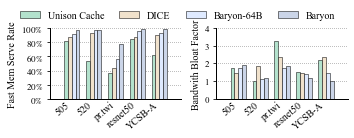

In [25]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.add_subplot(1, 2, 1)
easypyplot.format.turn_off_box(ax)

h = easypyplot.barchart.draw(
    ax, fig_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=fig_xlabels,
    xticks=fig_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=40, # Uncomment this for rotated x tick labels
    colors=fig_bar_colors)

''' x axis '''
ax.xaxis.set_tick_params(pad=-3)
# fig_xticks = [item-0.5 for item in fig_xticks]
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.set_xticks(fig_xticks)
abbr_wk_name = []
for item in fig_xlabels:
    if item.startswith('5'):
        abbr_wk_name.append(str(item[0:3]))
    else:
        abbr_wk_name.append(workload_dict[item])
ax.set_xticklabels(abbr_wk_name, fontsize=fig_label_fontsize, fontproperties=ft, ha='right')
ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# ax.tick_params(direction='in') # [in, out, inout]
# ax.set_xlabel(fig_title)
''' y axis '''
easypyplot.format.set_axis_to_percent(ax.yaxis)
ax.yaxis.grid(True)
ax.set_ylim(fig_ylim)
ax.set_yticks(fig_yticks)
ax.set_ylabel('Fast Mem Serve Rate', multialignment='center', fontproperties=ft)

ax2 = fig.add_subplot(1, 2, 2)
easypyplot.format.turn_off_box(ax2)
h2 = easypyplot.barchart.draw(
    ax2, bw_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=bw_xlabels,
    xticks=bw_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=40,
    colors=bw_bar_colors)
''' x axis '''
ax2.xaxis.set_tick_params(pad=-3)
ax2.set_xlim([ax2.get_xticks()[0] - 1, ax2.get_xticks()[-1] + 1])
ax2.set_xticks(fig_xticks)
abbr_wk_name = []
for item in fig_xlabels:
    if item.startswith('5'):
        abbr_wk_name.append(str(item[0:3]))
    else:
        abbr_wk_name.append(workload_dict[item])
ax2.set_xticklabels(abbr_wk_name, fontsize=fig_label_fontsize, fontproperties=ft, ha='right')
ax2.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# ax.tick_params(direction='in') # [in, out, inout]
''' y axis '''
# easypyplot.format.set_axis_to_percent(ax2.yaxis)
ax2.yaxis.grid(True)
ax2.set_ylim(bw_ylim)
ax2.set_yticks(bw_yticks)
ax2.set_ylabel('Bandwith Bloat Factor', multialignment='center', fontproperties=ft)
# ax2.set_xlabel('(b) Super-block Size', fontproperties=ft)

''' legend '''
legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(h, legend, loc='upper center', bbox_to_anchor=(0.5, 1.09),
        ncol=4, frameon=False, prop=ft, columnspacing=1.5)

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.8)
easypyplot.format.resize_ax_box(ax2, hratio=0.8)

In [26]:
''' Save figures'''
fig.savefig(fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures